# Regresion Lineal: Costo de un incidente de Seguridad

En este ejercicio se explican los fundamentos basicos de la regresion lineal aplicado a un caso de uso sencillo relacionado con la ciberseguridad

## Enunciado del Ejercicio

El ejercicio consiste en predecir el costo de un incidente de seguridad en base a los equipos que han sido afectados. El conjunto de datos es generado de manera aleatoria

### 1.- Generacion del Conjunto de Datos 

In [4]:
import numpy as np

x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
print("La longitud del conjuto de datos es: ", len(x))

La longitud del conjuto de datos es:  100


### 2.- Visualización del Conjunto de Datos

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

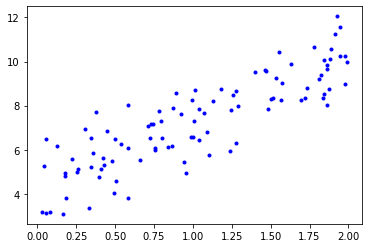

In [9]:
plt.plot(x, y, 'b.')
plt.show()

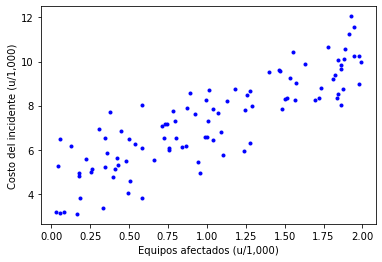

In [10]:
plt.plot(x, y, 'b.')
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/1,000)")
plt.show()

### 3.- Modificacion del Conjunto de Datos

In [11]:
import pandas as pd

In [13]:
data = {'No_Equipos_Afectados' : x.flatten(), 'Costo' : y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.126697,6.182210
1,0.581263,6.087561
2,1.928344,12.050518
3,1.279826,8.666840
4,1.975260,10.244040
5,1.399519,9.545761
6,0.183477,3.831531
7,0.178121,4.935774
8,0.506714,4.581154
9,1.978304,8.966880


In [14]:
# Escalado de numero de equipos afectados
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'] * 1000
df['No_Equipos_Afectados'] = df['No_Equipos_Afectados'].astype('int')
# escalado del costo
df['Costo'] = df['Costo'] * 10000
df['Costo'] = df['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,126,61822
1,581,60875
2,1928,120505
3,1279,86668
4,1975,102440
5,1399,95457
6,183,38315
7,178,49357
8,506,45811
9,1978,89668


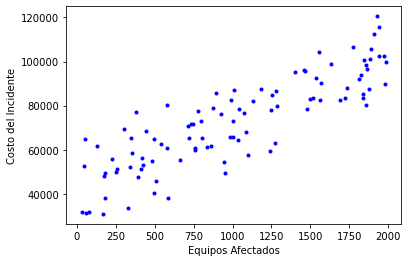

In [15]:
# Representacion grafica del conjunto de datos
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del Incidente")
plt.show()

### 4.- Construccion del Modelo

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
# Construccion del modelo y ajuste de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

LinearRegression()

In [20]:
# Calcular Parametro Theta 0
lin_reg.intercept_

43134.18431240339

In [21]:
# parametros Theta 1
lin_reg.coef_

array([29.21752878])

In [22]:
# Prediccion para el valor minimo y maximo de datos de entrenamiento
x_min_max = np.array([[df['No_Equipos_Afectados'].min()], [df['No_Equipos_Afectados'].max()]])
y_train_pred = lin_reg.predict(x_min_max)

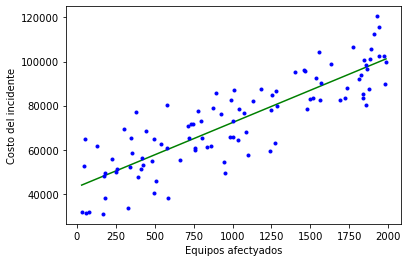

In [24]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.xlabel("Equipos afectyados")
plt.ylabel("Costo del incidente")
plt.show()

### 5.- Prediccion de Nuevos Ejemplos

In [34]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# La prediciion del costo que tendria el insidente
costo = lin_reg.predict(x_new)
print("El costo del incidente seria: $", int(costo[0]))

El costo del incidente seria: $ 81116


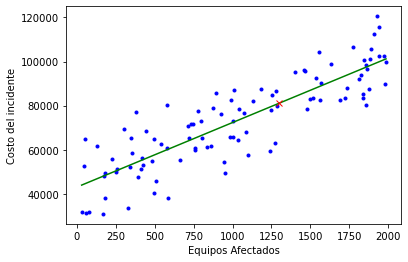

In [35]:
plt.plot(df['No_Equipos_Afectados'], df['Costo'], "b.")
plt.plot(x_min_max, y_train_pred, "g-")
plt.plot(x_new, costo, "rx")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.show()